<a href="https://colab.research.google.com/github/nksubramanian/.NETclientSignalR/blob/main/LatestInferenceSurgicalInstruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inference from a saved model

In [1]:
!pip install Pillow==8.4.0
# restart is required after this cell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
!bash icevision_install.sh cuda11 master


--2022-10-30 02:56:48--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2820 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-10-30 02:56:48 (39.7 MB/s) - ‘icevision_install.sh’ saved [2820/2820]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.4 MB/s eta 0:15:06tcmalloc: large alloc 1147494400 bytes == 0x39996000 @  0x7ff57eea2615 0x

In [3]:
!pip install -U sahi==0.10.8

import icevision
from icevision.all import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: sahi
    Found existing installation: sahi 0.11.0
    Uninstalling sahi-0.11.0:
      Successfully uninstalled sahi-0.11.0
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

INFO     - Downloading mmseg configs | icevision.models.mmseg.download_configs:download_mmseg_configs:33


0B [00:00, ?B/s]

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [5]:
root_dir = Path('/content/gdrive/My Drive/')

In [6]:
classes = ['Army_navy', 'Bulldog', 'Castroviejo','Forceps', 'Frazier', 'Hemostat','Iris','Mayo_metz','Needle','Potts','Richardson','Scalpel','Towel_clip', 'Weitlaner','Yankauer']
class_map = ClassMap(classes)
len(class_map)

16

In [7]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

from icevision.models.checkpoint import *

model_type = models.mmdet.vfnet ##
backbone = model_type.backbones.resnet50_fpn_mstrain_2x##

In [ ]:
#!ls gdrive/MyDrive/Surgical_instruments/Models

notebooks  README.md  VFNet_teacher_nov29_mAP82.6.pth


In [8]:
from icevision.models import *

checkpoint_path = root_dir/'Models/VFNet_teacher_nov29_mAP82.6.pth' 

checkpoint_and_model = model_from_checkpoint(checkpoint_path)

model_loaded = checkpoint_and_model["model"]

load checkpoint from local path: /content/gdrive/My Drive/Models/VFNet_teacher_nov29_mAP82.6.pth


/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2022-10-30 03:05:50,717 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-10-30 03:05:50,720 - mmcv - INFO - load model from: torchvision://resnet50
2022-10-30 03:05:50,725 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

2022-10-30 03:05:52,246 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-10-30 03:05:52,287 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-10-30 03:05:52,323 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2022-10-30 03:05:52,372 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-10-30 03:05:52,374 - mmcv - INFO - 
backbone.bn1.weight - torch.Size([64]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-10-30 03:05:52,386 - mmcv - INFO - 
backbone.bn1.bias - torch.Size([64]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-10-30 03:05:52,387 - mmcv - INFO - 
backbone.layer1.0.conv1.weight - torch.Size([64, 

In [9]:
img_size = checkpoint_and_model["img_size"]

valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

#infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)
#infer_ds = Dataset(test_records, valid_tfms)#, class_map = class_map)

Gradio deployment using saved model

In [10]:
!git clone https://github.com/nksubramanian/ColabRepo.git

Cloning into 'ColabRepo'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [11]:
path = Path('/content/ColabRepo') # 

test_parser = parsers.COCOBBoxParser(
    annotations_filepath = path/'_annotations.coco.json',
    img_dir = path)

whole = SingleSplitSplitter()

test_records, *_ = test_parser.parse(data_splitter = whole)

  0%|          | 0/1 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
img_size = checkpoint_and_model["img_size"]

valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

#infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)
#, class_map = class_map)

In [13]:
infer_ds = Dataset(test_records, valid_tfms)
infer_dl = model_type.infer_dl(infer_ds, 
                               batch_size=1, shuffle=False)

preds_saved_test = model_type.predict_from_dl(model_loaded,#
                                              infer_dl,
                                          keep_images=True, 
                                         detection_threshold = 0.5) ##

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


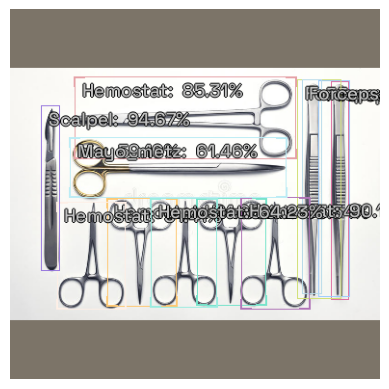

BaseRecord

common: 
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
	- Record ID: 0
detection: 
	- Class Map: <ClassMap: {'background': 0, 'Army_navy': 1, 'Bulldog': 2, 'Castroviejo': 3, 'Forceps': 4, 'Frazier': 5, 'Hemostat': 6, 'Iris': 7, 'Mayo_metz': 8, 'Needle': 9, 'Potts': 10, 'Richardson': 11, 'Scalpel': 12, 'Towel_clip': 13, 'Weitlaner': 14, 'Yankauer': 15}>
	- Labels: [4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 7, 8, 12]
	- BBoxes: [<BBox (xmin:333.0979919433594, ymin:75.01341247558594, xmax:351.0166320800781, ymax:301.08184814453125)>, <BBox (xmin:320.74951171875, ymin:74.43268585205078, xmax:352.9155578613281, ymax:298.924072265625)>, <BBox (xmin:298.7736511230469, ymin:73.65059661865234, xmax:343.8101806640625, ymax:300.2615966796875)>, <BBox (xmin:303.1775207519531, ymin:73.4005126953125, xmax:323.40032958984375, ymax:295.31109619140625)>, <BBox (xmin:194.84104919433594, ymin:196.70431518554688, xmax:265.6391296386719, ymax:307.9051513671875)>, <BBox (

In [21]:
import json
a=0
show_sample(preds_saved_test[a])
s1 = preds_saved_test[a].pred
#jsonstr1 = json.dumps(s1.__dict__)
print(s1)

In [59]:
import json
a=0
#show_sample(preds_saved_test[a])
s1 = preds_saved_test[a].pred
res = {}
res['items'] = s1.as_dict()['detection']['labels']
res['scores'] = list(s1.as_dict()['detection']['scores'].tolist())
jsonstring = json.dumps(res)
print(jsonstring)

{"items": ["Forceps", "Forceps", "Forceps", "Forceps", "Hemostat", "Hemostat", "Hemostat", "Hemostat", "Hemostat", "Hemostat", "Iris", "Mayo_metz", "Scalpel"], "scores": [0.8456107974052429, 0.7599316239356995, 0.7151122689247131, 0.6651082038879395, 0.9353919625282288, 0.9162822365760803, 0.9141175150871277, 0.9015740156173706, 0.8530572056770325, 0.6422646641731262, 0.5909873247146606, 0.6145898103713989, 0.9467455744743347]}


In [2]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 18.6 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=8e4dbc4dfaa76907bde7cfa9d0c8060ab877fd4fe6efe4bf7bc1ed993935b837
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [1]:
%mkdir templates -p
%mkdir uploads -p

In [3]:
%%writefile templates/index.html
<html>
<head>
<title>Python Flask Upload and display image</title>
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/css/bootstrap.min.css" />        
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.1.0/jquery.min.js"></script>
</head>
<body>
<p><h1 align="center">Python Flask Upload and display image</h1></p>
<div class="container">
<div class="row">
    <h2>Select a file to upload</h2>
    <p>
        {% with messages = get_flashed_messages() %}
          {% if messages %}
            <ul>
            {% for message in messages %}
              <li>{{ message }}</li>
            {% endfor %}
            </ul>
          {% endif %}
        {% endwith %}
    </p>
    {% if filename %}
        <div>
            <img src="{{ url_for('display_image', filename=filename) }}">
        </div>
    {% endif %}
    <form method="post" action="/" enctype="multipart/form-data">
        <dl>
            <p>
                <input type="file" name="file" class="form-control" autocomplete="off" required>
            </p>
        </dl>
        <p>
            <input type="submit" value="Submit" class="btn btn-info">
        </p>
    </form>
</div>
</div>
</body>
</html>

Writing templates/index.html


In [4]:
from flask import Flask, render_template
import os
import threading

from flask import Flask, flash, request, redirect, url_for, render_template
import urllib.request
import os
from werkzeug.utils import secure_filename

from flask import Flask, render_template
from pyngrok import ngrok
os.environ["FLASK_ENV"] = "development"

In [5]:
app = Flask(__name__)
UPLOAD_FOLDER = '/content/uploads'
 
app.secret_key = "secret key"
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024
 
ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif'])
 
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
port = 5000
ngrok.set_auth_token("1yXn3NSEMkqwyXHoBjWGC7sw1ul_754qikbMjYAP1xC68G4sT")
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel\"{}\"-> \"http://127.0.0.1:{}\"".format(public_url,port))
app.config["BASE_URL"] = public_url
@app.route("/")
def hello():
    return render_template("index.html")

@app.route('/', methods=['POST'])
def upload_image():
    if 'file' not in request.files:
        flash('No file part')
        return redirect(request.url)
    file = request.files['file']
    if file.filename == '':
        flash('No image selected for uploading')
        return redirect(request.url)
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'], "x."+filename.rsplit('.', 1)[1].lower()))
        #print('upload_image filename: ' + filename)
        flash('Image successfully uploaded and displayed below')
        return render_template('index.html', filename=filename)
    else:
        flash('Allowed image types are - png, jpg, jpeg, gif')
        return redirect(request.url)
 
@app.route('/display/<filename>')
def display_image(filename):
    #print('display_image filename: ' + filename)
    return redirect(url_for('static', filename='uploads/' + filename), code=301)
threading.Thread(target=app.run, kwargs={"use_reloader":False}).start()

 * ngrok tunnel"http://1ec3-34-124-201-67.ngrok.io"-> "http://127.0.0.1:5000"
 * Serving Flask app "__main__" (lazy loading)
 * Environment: development
 * Debug mode: on


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
%mkdir templates -p
%mkdir uploads -p